In [1]:
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('patients_data_from_images.4.csv')

In [3]:
df['label'] = (df['total_md_gap_per_year']<-1).astype(int)
features = [f for f in df.columns if f not in ['total_md_gap_per_year','label']]

In [4]:
pixel_features = features[5:5+52]+features[62:62+52]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df['label'], test_size=0.3, random_state=100)

In [6]:
len(X_train)

129

In [7]:
y_train.value_counts()

0    116
1     13
Name: label, dtype: int64

## SVM (fails badly)

In [13]:
for c in [1e-3,1e-2,1,1e2,1e3]:
#for g in np.array(range(1,10))/10.0:
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=c, probability=True,class_weight='balanced')
    score = cross_val_score(rbf_svc, X_train, y_train, cv=5)
    print(score)
    rbf_svc.fit(X_train,y_train)
    y_predict = rbf_svc.predict_proba(X_test)
    print(roc_auc_score(y_test,y_predict[:,1]))

[0.88888889 0.88461538 0.88461538 0.08       0.08      ]
0.5
[0.88888889 0.88461538 0.88461538 0.08       0.08      ]
0.5
[0.88888889 0.88461538 0.88461538 0.92       0.92      ]
0.5
[0.88888889 0.88461538 0.88461538 0.92       0.92      ]
0.5
[0.88888889 0.88461538 0.88461538 0.92       0.92      ]
0.5


## Decision Tree (Not as good as Random Forest)

In [14]:
from sklearn.tree import DecisionTreeClassifier
for i in range(0,1000,100):
    clf = DecisionTreeClassifier(random_state=i, class_weight='balanced')
#    score = cross_val_score(clf, X_train, y_train, cv=5)
#    print(np.mean(score))
    clf.fit(X_train,y_train)
    y_predict = clf.predict_proba(X_test)
    print(roc_auc_score(y_test,y_predict[:,1]))

0.4444444444444444
0.4537037037037037
0.4537037037037037
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4537037037037037
0.4444444444444444


## PCA for dimension of the problem

In [15]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_

array([9.07394658e-01, 9.24506778e-02, 8.35144011e-05, 4.88474270e-05,
       8.72054325e-06, 3.12636013e-06, 1.74533922e-06, 1.06637368e-06,
       8.51398445e-07, 7.03120505e-07, 5.20858402e-07, 4.57765534e-07,
       4.25941050e-07, 3.73658346e-07, 3.37904152e-07, 2.85177844e-07,
       2.43943562e-07, 2.07284295e-07, 1.93421762e-07, 1.86555121e-07,
       1.67799335e-07, 1.59222339e-07, 1.40159498e-07, 1.32591124e-07,
       1.28858196e-07, 1.26389547e-07, 1.16025485e-07, 1.07599155e-07,
       1.04259178e-07, 9.66803277e-08, 9.37581921e-08, 8.26509525e-08,
       8.06269214e-08, 7.48726627e-08, 7.40710195e-08, 7.01157860e-08,
       6.50596460e-08, 6.09574763e-08, 5.64117275e-08, 5.35082423e-08,
       5.12579527e-08, 4.85314979e-08, 4.46098849e-08, 4.10438401e-08,
       4.00711531e-08, 3.76650256e-08, 3.48298010e-08, 3.29626167e-08,
       3.17455838e-08, 2.97592711e-08, 2.94086725e-08, 2.85274851e-08,
       2.77705426e-08, 2.48764495e-08, 2.14246669e-08, 2.06906272e-08,
      

In [17]:
from sklearn.model_selection import train_test_split

trend = []
for ne in [10, 100,300,500,800,1500]:
    for i in [0,]:#range(0,1000,100):
        score = []
        
        for mf in range(2,7):
            for j in range(0,1000,30):
                X_train, X_test, y_train, y_test = train_test_split(df[features], df['label'], test_size=0.3, random_state=j)
                clf = RandomForestClassifier(
                    n_estimators=ne,
                    max_depth=2, max_features=mf, random_state=i,class_weight='balanced')
        #         score = cross_val_score(clf, X_train, y_train, cv=5)
        #         print(np.mean(score))  
                clf.fit(X_train,y_train)
                y_predict = clf.predict_proba(X_test)
                score.append(roc_auc_score(y_test,y_predict[:,1]))
        print(np.mean(score))
        trend.append(np.mean(score))

0.7023180231268138
0.732302835657723
0.7447923005237673
0.7459085864138597
0.7460627197116386
0.7456567890819223


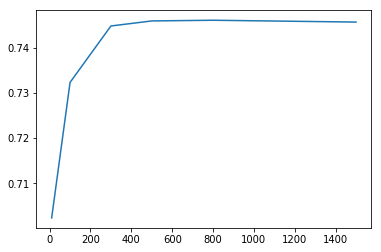

In [18]:
plt.plot([10, 100,300,500,800,1500],trend)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(df)
for train_index, test_index in kf.split(df):
    X_train, X_test = df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_test = df['label'].iloc[train_index], df['label'].iloc[test_index]